In [4]:
srand(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = zeros(N*K, D)
y = zeros(UInt8, N*K)

#generating the spiral shaped data points
for j = 0:K-1
    ix = range((N*j)+1, N) #  ranges & indexes in Julia and python are different!! :)!
    r = linspace(0.0, 1.0, N) #radius
    t = linspace(j*4, (j+1)*4, N) + randn(N)*0.2 #radius
    X[ix,:] = [r.*sin(t) r.*cos(t)]
    y[ix] = j+1    # classes = [1 2 3]
end





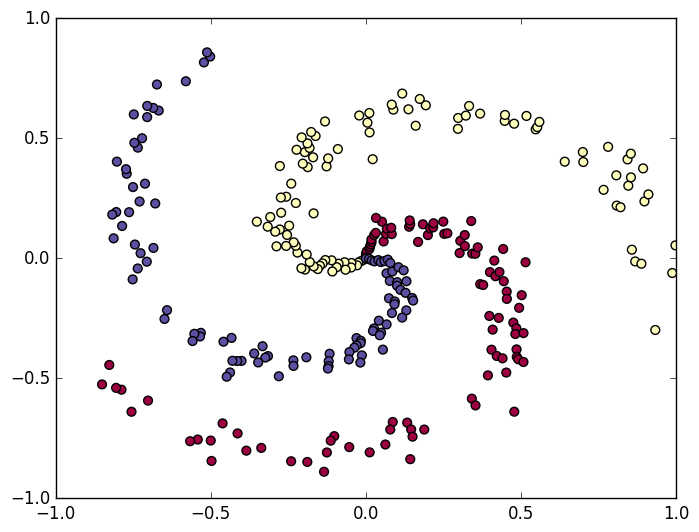

(-1,1)

In [6]:
using PyPlot
scatter(X[:,1], X[:,2], c=y, s=40, cmap=ColorMap("Spectral"))
xlim([-1,1])
ylim([-1,1])

In [10]:
# Train linear classifier
# initialize parameters randomly
W = 0.01 * randn(D,K)
b = zeros(1,K)

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = size(X)[1]

for iter = range(0,200)
     # evaluate class scores, [N x K]
    #Scores function is f
    scores = (X * W) .+ b
    # Class probabilities
    exp_scores = exp(scores)
    probs = exp_scores./sum(exp_scores,2)
    # Compute the loss average: avg cross-entropy and regularization
    correct_probs = zeros(num_examples)
    for i = 1:num_examples
        correct_probs[i] = probs[i,y[i]]
    end
    correct_logprobs = -log(correct_probs)
    data_loss = sum(correct_logprobs)/float(num_examples)
    reg_loss = 0.5 * reg * sum(W.*W)
    loss = data_loss + reg_loss
    if (iter % 10 == 0)
        println("iteration $iter : loss $loss")
    end
    
    # compute the gradient on scores
    # dL/df = pk -1
    dscores = probs
    # dscores[range(num_examples),y]
    for (r,c) in enumerate(y)
        dscores[r,c] -= 1.0
    end
    
    dscores /= num_examples
    # backpropate the gradient to the parameters (W,b)
    dW = X' * dscores
    db = sum(dscores,1)
    
    dW += reg*W
    
     # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
end
    
    
    
    
    
    
    
    
    
    
    


iteration 0 : loss 1.0967026862828835
iteration 10 : loss 0.9104160875515493
iteration 20 : loss 0.8406175431510741
iteration 30 : loss 0.8085890731069181
iteration 40 : loss 0.7917631807009127
iteration 50 : loss 0.7821043268568533
iteration 60 : loss 0.7762120981240982
iteration 70 : loss 0.7724575317777214
iteration 80 : loss 0.7699863919602331
iteration 90 : loss 0.7683192604002334
iteration 100 : loss 0.7671726416232162
iteration 110 : loss 0.7663718561823991
iteration 120 : loss 0.7658056677362257
iteration 130 : loss 0.7654013200117853
iteration 140 : loss 0.7651101690757189
iteration 150 : loss 0.7648990960486804
iteration 160 : loss 0.7647452084876211
iteration 170 : loss 0.7646324810110698
iteration 180 : loss 0.7645495753006262
iteration 190 : loss 0.7644883968396238


In [20]:
# evaluate training set accuracy
function argmax_cols(mat)
    args = ceil(findmax(mat,2)[2]./size(mat)[1])
    return round(Int64,args)
end
    
scores = X*W .+ b
predicted_class = argmax_cols(scores)
tr_accr = mean(predicted_class .== y)
println("The training accuracy is: $tr_accr")


The training accuracy is: 0.5166666666666667


In [23]:
#https://github.com/JuliaLang/julia/blob/master/examples/ndgrid.jl
meshgrid(v::AbstractVector) = meshgrid(v, v)

function meshgrid{T}(vx::AbstractVector{T}, vy::AbstractVector{T})
    m, n = length(vy), length(vx)
    vx = reshape(vx, 1, n)
    vy = reshape(vy, m, 1)
    (repmat(vx, m, 1), repmat(vy, 1, n))
end

meshgrid (generic function with 2 methods)

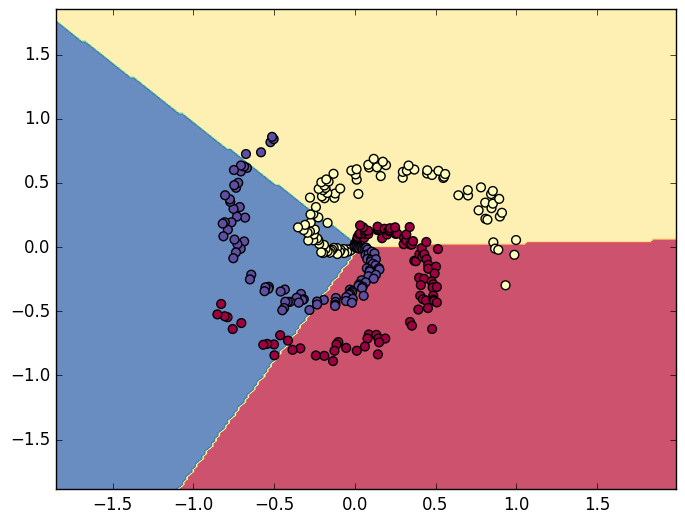

(-1.8887812511748268,1.8512187488251735)

In [26]:
# plot the resulting classifier

h = 0.02
x_min, x_max = minimum(X[:,1]) - 1, maximum(X[:, 1]) + 1
y_min, y_max = minimum(X[:,2]) - 1, maximum(X[:, 2]) + 1
xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)
Z = hcat(vec(xx),vec(yy)) * W .+ b
Z = argmax_cols(Z)
Z = reshape(Z, size(xx))

contourf(xx, yy, Z, cmap=ColorMap("Spectral"), alpha=0.8)
scatter(X[:,1], X[:,2], c=y, s=40, cmap=ColorMap("Spectral"))
xlim([minimum(xx), maximum(xx)])
ylim([minimum(yy), maximum(yy)])




In [34]:
# init parameters for hidden layer
h = 100
W = 0.01 * randn(D,h)
b = zeros(1,h)
W2 = 0.01 * randn(h,K)
b2 = zeros(1,K)

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

num_examples = size(X)[1]
# gradient descent loop
tic()
for iter in range(0,10000)
    
    # evaluate class scores, [N x K]
    hidden_layer = max(0.0, X*W .+ b)  # ReLU activation layer
    scores = hidden_layer * W2 .+ b2
    
    # compute the class probabilities
    exp_scores = exp(scores)
    probs = exp_scores./sum(exp_scores, 2)
    
    # compute the loss: average cross-entropy loss and regularization
    correct_probs = zeros(num_examples)
    for (idx,yval) in enumerate(y)
        correct_probs[idx] = probs[idx,yval]
    end
    correct_logprobs = -log(correct_probs)
    data_loss = sum(correct_logprobs)/float(num_examples)
    reg_loss = 0.5 * reg * sum(W.*W) + 0.5 * reg * sum(W2.*W2)
    loss = data_loss + reg_loss
    
#     if(iter %1000 == 0)
#         println("iteration $iter: loss $loss")
#     end
    
    # Compute the gradient on scores
    # dL/df = pk -1
    dscores = probs
    # dscores[range(num_examples),y]
    for (r,c) in enumerate(y)
        dscores[r,c] -= 1.0
    end    
    dscores /= num_examples
    
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = hidden_layer' * dscores
    db2 = sum(dscores, 1)
    
    # next backprop into hidden layer
    dhidden = dscores * W2'
    
    # backprop the ReLU non-linearity
    dhidden[find(hidden_layer .<= 0.0)] = 0.0
    # finally into W,b
    dW = X' * dhidden
    db = sum(dhidden, 1)
    
    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
end

toc()
    
    
    
    
    
    
    
    
    


elapsed time: 13

13.086740199

.086740199 seconds


In [28]:
# evaluate training set accuracy
hidden_layer = max(0.0, X * W .+ b)
scores = hidden_layer * W2 .+ b2
predicted_class = argmax_cols(scores)
tr_accr = mean(predicted_class .== y)
println("The training accuracy is: $tr_accr")


The training accuracy is: 0.99


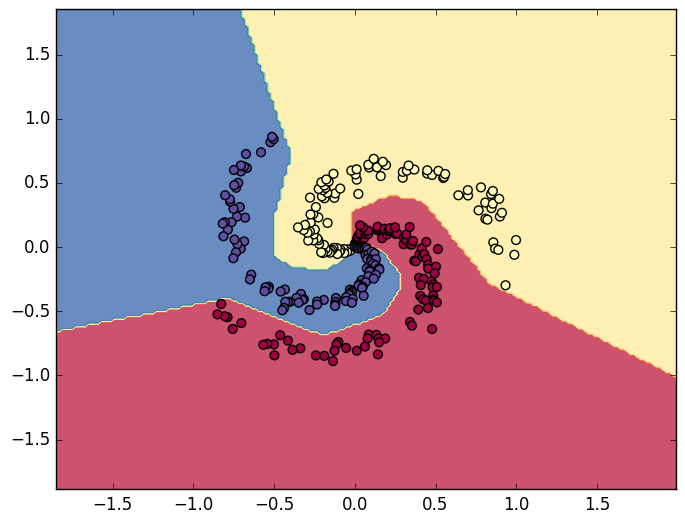

(-1.8887812511748268,1.8512187488251735)

In [30]:
# plot the resulting classifier

h = 0.02
x_min, x_max = minimum(X[:,1]) - 1, maximum(X[:, 1]) + 1
y_min, y_max = minimum(X[:,2]) - 1, maximum(X[:, 2]) + 1
xx, yy = meshgrid(x_min:h:x_max, y_min:h:y_max)
Z = max(0.0, hcat(vec(xx),vec(yy)) * W .+ b)
Z = Z * W2 .+ b2
Z = argmax_cols(Z)
Z = reshape(Z, size(xx))

contourf(xx, yy, Z, cmap=ColorMap("Spectral"), alpha=0.8)
scatter(X[:,1], X[:,2], c=y, s=40, cmap=ColorMap("Spectral"))
xlim([minimum(xx), maximum(xx)])
ylim([minimum(yy), maximum(yy)])


